Data cleaning is one of the important parts of machine learning. It plays a significant part in building a model. 

* Removal of Unwanted Observations: Identify and eliminate irrelevant or redundant observations from the dataset. The step involves scrutinizing data entries for duplicate records, irrelevant information, or data points that do not contribute meaningfully to the analysis. Removing unwanted observations streamlines the dataset, reducing noise and improving the overall quality.
* Fixing Structure errors: Address structural issues in the dataset, such as inconsistencies in data formats, naming conventions, or variable types. Standardize formats, correct naming discrepancies, and ensure uniformity in data representation. Fixing structure errors enhances data consistency and facilitates accurate analysis and interpretation.
* Managing Unwanted outliers: Identify and manage outliers, which are data points significantly deviating from the norm. Depending on the context, decide whether to remove outliers or transform them to minimize their impact on analysis. Managing outliers is crucial for obtaining more accurate and reliable insights from the data.
* Handling Missing Data: Devise strategies to handle missing data effectively. This may involve imputing missing values based on statistical methods, removing records with missing values, or employing advanced imputation techniques. Handling missing data ensures a more complete dataset, preventing biases and maintaining the integrity of analyses.

Here we will be using the titanic dataset for analysis.

In [1]:
import pandas as pd
import numpy as np
 

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let’s first understand the data by inspecting its structure and identifying missing values, outliers, and inconsistencies and check the duplicate rows with below python code

In [3]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

Check the data information using df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above data info, we can see that Age and Cabin have an unequal number of counts. And some of the columns are categorical and have data type objects and some are integer and float values.

Check the Categorical and Numerical Columns.

In [5]:

cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Check the total number of Unique Values in the Categorical Columns

In [6]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [8]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

Drop Name and Ticket Columns

In [9]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

### Handling Missing Data
Missing data is a common issue in real-world datasets, and it can occur due to various reasons such as human errors, system failures, or data collection issues. Various techniques can be used to handle missing data, such as imputation, deletion, or substitution.

* The two most common ways to deal with missing data are:
1. Dropping Observations with missing values.
The fact that the value was missing may be informative in itself.
Plus, in the real world, you often need to make predictions on new data even if some of the features are missing!

In [10]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

### Imputing the missing values from past observations.

We can use Mean imputation or Median imputations for the case.

* Mean imputation is suitable when the data is normally distributed and has no extreme outliers.
* Median imputation is preferable when the data contains outliers or is skewed.

In [11]:
df3 = df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Handling Outliers
Outliers are extreme values that deviate significantly from the majority of the data. They can negatively impact the analysis and model performance. Techniques such as clustering, interpolation, or transformation can be used to handle outliers.

To check the outliers, We generally use a box plot. A box plot, also referred to as a box-and-whisker plot, is a graphical representation of a dataset’s distribution. It shows a variable’s median, quartiles, and potential outliers. The line inside the box denotes the median, while the box itself denotes the interquartile range (IQR). The whiskers extend to the most extreme non-outlier values within 1.5 times the IQR. Individual points beyond the whiskers are considered potential outliers

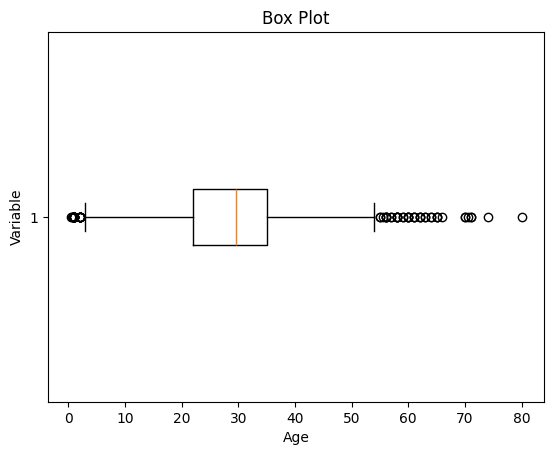

In [13]:
import matplotlib.pyplot as plt
 
plt.boxplot(df3['Age'],vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [14]:

mean = df3['Age'].mean()
std  = df3['Age'].std()
 

lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 

df4 = df3[(df3['Age'] >= lower_bound) 
                & (df3['Age'] <= upper_bound)]

Lower Bound : 3.7054001079256587
Upper Bound : 55.57878528533277


Data Transformation <br>
Data transformation involves converting the data from one form to another to make it more suitable for analysis. Techniques such as normalization, scaling, or encoding can be used to transform the data.

Data validation and verification involve ensuring that the data is accurate and consistent by comparing it with external sources or expert knowledge. 

In [15]:

X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [16]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.642093,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [17]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

### Data formatting
Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis. Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization.

### Scaling

Scaling involves transforming the values of features to a specific range. It maintains the shape of the original distribution while changing the scale.
Particularly useful when features have different scales, and certain algorithms are sensitive to the magnitude of the features.

Common scaling methods include Min-Max scaling and Standardization (Z-score scaling).
* Min-Max Scaling: Min-Max scaling rescales the values to a specified range, typically between 0 and 1. It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.

In [19]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler(feature_range=(0, 1))
 

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X

x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_2204\3065507775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


* Standardization (Z-score scaling): <br> Standardization transforms the values to have a mean of 0 and a standard deviation of 1. It centers the data around the mean and scales it based on the standard deviation. Standardization makes the data more suitable for algorithms that assume a Gaussian distribution or require features to have zero mean and unit variance.

Z = (X - μ) / σ

Where, <br>

X = Data
μ = Mean value of X
σ = Standard deviation of X